In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.backend_bases import MouseButton
from uncertainties import unumpy as un
from inspect import getsourcefile
#import os.path as path, sys
#current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
#sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])
#from AP import *

In [ ]:
#Digitizer
#ch.0:  FALSE 	 ch.1:  TRUE 	 DC offset 0: 0 	 DC offset 1: 0 	 act ch:  1 	trig mode:  TRUE 	 rise time:  8 	 trig mean:  8 	 trig thr 0:  30 	 trig thr 1:  500 	gate mode:  FALSE 	 gate width:  504 	 pre gate:  0 	 holdoff:  504 	bsln mean:  16 	 bsln thr:  8 	 noflattime:  512 	GPO:  2 	 coinc:  FALSE 	 coinc time:  0 
#PSAU
#ch.0:  FALSE 	 ch.1:  TRUE 	 Vset 0:  30,900000 	 Vset 1:  55,000000 	 Gain0:  32 	 Gain1:  32 	 comp0:  FALSE 	 comp1:  TRUE 	 thr0:  -14,000000 	 thr1:  -15,000000 	 width0:  110 	 width1:  110 	 DOUT0:  FALSE 	 DOUT1:  TRUE 	 outputlevel:  TTL 	 coinc:  FALSE 	 coinc time:  20 
#
#Vmon 0:  0,000000 	 Vmon 1:  54,939999 	 Temp 0:  26,700001 	 Temp 1:  24,100000 	 Temp board:  27,799999 
#day&time: 08Apr24112648

In [ ]:
#Digitizer
#ch.0:  FALSE 	 ch.1:  TRUE 	 DC offset 0: 0 	 DC offset 1: 0 	 act ch:  1 	trig mode:  TRUE 	 rise time:  8 	 trig mean:  8 	 trig thr 0:  30 	 trig thr 1:  500 	gate mode:  FALSE 	 gate width:  504 	 pre gate:  0 	 holdoff:  504 	bsln mean:  16 	 bsln thr:  8 	 noflattime:  512 	GPO:  2 	 coinc:  FALSE 	 coinc time:  0 
#PSAU
#ch.0:  FALSE 	 ch.1:  TRUE 	 Vset 0:  30,900000 	 Vset 1:  55,000000 	 Gain0:  32 	 Gain1:  32 	 comp0:  FALSE 	 comp1:  TRUE 	 thr0:  -14,000000 	 thr1:  -15,000000 	 width0:  110 	 width1:  110 	 DOUT0:  FALSE 	 DOUT1:  TRUE 	 outputlevel:  TTL 	 coinc:  FALSE 	 coinc time:  20 
#
#Vmon 0:  0,000000 	 Vmon 1:  54,939999 	 Temp 0:  26,500000 	 Temp 1:  23,600000 	 Temp board:  27,700001 
#day&time: 08Apr24111235

In [8]:
dcr = pd.read_csv('bertha-dcr_staircase.txt',sep='	',decimal=',')
dcr.info()
c = pd.read_csv('bertha-dcr_staircase.txt',sep='	',decimal=',')
c_ohne = pd.read_csv('bertha_staircase_without_dcr.txt',sep='	',decimal=',')
print(c_ohne)
c_discri=c_ohne['discrimination'].to_numpy()
c_countrate=c_ohne['count rate'].to_numpy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   discri      20 non-null     float64
 1   count rate  20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes
    discrimination  count rate
0             40.0       2.833
1             50.0       4.167
2             60.0       3.333
3             70.0       2.333
4             80.0       2.833
5             90.0       1.833
6            100.0       2.500
7            110.0       2.167
8            120.0       3.333
9            130.0       2.000
10           140.0       2.000
11           150.0       1.667
12           160.0       1.667
13           170.0       1.500
14           180.0       1.000
15           190.0       0.333
16           200.0       1.333


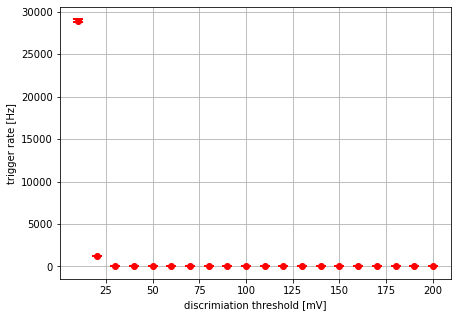

In [9]:
dcr['error'] = np.sqrt(dcr['count rate'])
fig , ax =  plt.subplots(figsize=(7,5))
plt.errorbar(dcr['discri'], dcr['count rate'], yerr=dcr['error'], fmt='o', capsize=5, capthick=2,color='red')

# Customize plot
#plt.title('Plot with Error Bars (Error = Square Root of Y)')
plt.xlabel('discrimiation threshold [mV]')
plt.ylabel('trigger rate [Hz]')
plt.grid(True)
#plt.yscale('log')
# Show plot
plt.show()
fig.savefig("dcr.png")

-0.015522058873688533
4.029235300136742
[0.00269585 0.34942189]


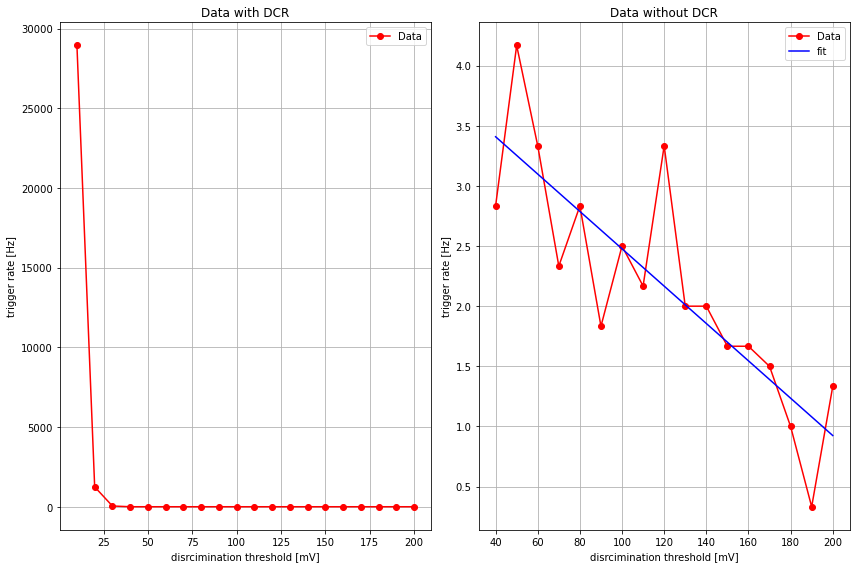

In [10]:
def model(x,c,d):
    return c*x+d



prop,er = curve_fit(model,c_discri,c_countrate)
print(prop[0])
print(prop[1])
print(np.sqrt(np.diag(er)))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot data with error bars on the first subplot
c.plot(x='discri', y='count rate', ax=axes[0], kind='line', marker='o', linestyle='-', color='red', label='Data')
axes[0].set_title('Data with DCR')
axes[0].set_xlabel('disrcimination threshold [mV]')
axes[0].set_ylabel('trigger rate [Hz]')
axes[0].grid()

# Plot data without error bars on the second subplot
c_ohne.plot(x='discrimination', y='count rate', ax=axes[1], kind='line', marker='o', linestyle='-', color='red', label='Data')
axes[1].plot(np.linspace(40,200),model(np.linspace(40,200),prop[0],prop[1]),label='fit',color='blue')
axes[1].set_title('Data without DCR')
axes[1].set_xlabel('disrcimination threshold [mV]')
axes[1].set_ylabel('trigger rate [Hz]')
axes[1].grid()
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
fig.savefig("cr.png")

#-0.015522058873688533
#4.029235300136742
#[0.00269585 0.34942189]

In [55]:
discri = dcr['discri'].to_numpy()
count_rate = dcr['count rate'].to_numpy()

def poisson_distribution(x, lamb):
    return np.exp(-lamb) * (lamb ** x) / np.math.factorial(x)

# Fit the data to the Poisson distribution
popt, pcov = curve_fit(poisson_distribution, discri.astype(int)
 , count_rate)

# Plot the original data
plt.errorbar(dcr['discri'], dcr['count rate'], yerr=dcr['error'], fmt='o', label='data',capsize=5, capthick=2)

# Plot the fitted Poisson distribution
x_values = np.arange(0, max(dcr['discri']) + 1, 10)
plt.plot(x_values, poisson_distribution(x_values, *popt), color='red', label='Poisson Fit')

# Customize plot
plt.title('Fit of Data to Poisson Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

# Save the figure
#plt.savefig('poisson_fit.png')

TypeError: only integer scalar arrays can be converted to a scalar index

In [56]:

# Extract data from DataFrame
discri = dcr['discri'].to_numpy()
discri=discri.astype(int)

print(type(discri))
print(discri)
count_rate = dcr['count rate'].to_numpy()
#error = dcr['error'].to_numpy()

def poisson_distribution(x, lamb):
    return np.exp(-lamb) * (lamb ** x) / np.math.factorial(x)

# Fit the data to the Poisson distribution
popt, pcov = curve_fit(poisson_distribution, discri, count_rate)

# Plot the original data
plt.errorbar(dcr['discri'], dcr['count rate'], yerr=dcr['error'], fmt='o', label='data', capsize=5, capthick=2)

# Plot the fitted Poisson distribution
x_values = np.arange(0, max(dcr['discri']) + 1, 1)
plt.plot(x_values, poisson_distribution(x_values, *popt), color='red', label='Poisson Fit')

# Customize plot
plt.title('Fit of Data to Poisson Distribution')
plt.xlabel('X')
plt.ylabel('Count Rate')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig('poisson_fit.png')

# Show the plot
plt.show()

<class 'numpy.ndarray'>
[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200]


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))

# Plot data with error bars on the first subplot
data.plot(x='x', y='y', ax=axes[0], yerr='error', kind='line', marker='o', linestyle='-', color='blue', label='Data')
axes[0].set_title('Data with Error Bars')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# Plot data without error bars on the second subplot
data.plot(x='x', y='y', ax=axes[1], kind='line', marker='o', linestyle='-', color='red', label='Data')
axes[1].set_title('Data without Error Bars')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

NameError: name 'ax1' is not defined

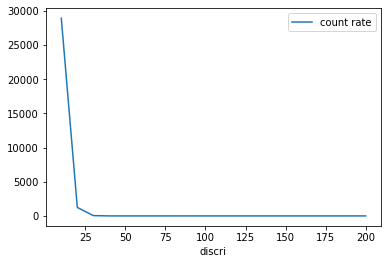

<Figure size 432x288 with 0 Axes>

In [17]:

ax=c.plot(x='discri',y='count rate')
fig=plt.figure()
c.plot(x='discrimination',y='count rate',ax=ax1)
dcr.plot(x='discri',y='count rate',ax=ax2)
plt.ax.set( xlabel='discrimination threshold [V]', ylabel= 'trigger rate [Hz]')
plt.grid()